In [7]:
import numpy as np
import matplotlib.pyplot as plt
import signalz

from src.huffman import *
from src.utils import *
from src.pdd_parser import *

In [14]:
def encode_LZ78(alphabet, data):
    alphabet = {tuple([c]): 0 for c in list(alphabet)}

    w = []
    phrases = []
    for c in data:
        wc = w + [c]
        if tuple(wc) in alphabet:
            w = wc
        else:
            phrases.append(tuple(w))
            alphabet[tuple(w)] += 1
            alphabet[tuple(wc)] = 0
            w = [c]

    if w:
        phrases.append(tuple(w))
        alphabet[tuple(w)] += 1

    codes = [code for code in alphabet.keys()]
    freqs = np.array([freq for freq in alphabet.values()])
    code_tree = build_huffman_tree(codes, freqs)
    encoded = [(phrase, code_tree[phrase]) for phrase in phrases]
    return encoded;

# 预处理
def call_LZ(x):
    min_val = min(x)
    max_val = max(x)
    number_of_bins = 100
    N = len(x)
    # print(f"preprocess: min={min(x)}, max={max(x)}, #bins={number_of_bins}")

    # Discretize the samples
    d_x = uniform_quantization(x, min_val, max_val, number_of_bins);

    # 初始化完整ALHABET
    bin_size = (max_val - min_val) / number_of_bins
    alphabet = [round(min_val + bin_size*(i+0.5), 4) for i in range(number_of_bins+1)]

    # 使用LZ78完成编码，注意每个序列会独立构建code tree
    c_x = encode_LZ78(alphabet, d_x);

    # 计算压缩比
    num_bits = sum([len(code) for (_, code) in c_x])
    num_samples = sum([len(phrase) for (phrase, _) in c_x])
    compress_ratio = (1-float(num_bits)/(64*N))*100
    # print(f"original: {64*N} bits, compressed: {num_bits} bits, compress ratio: {(1-float(num_bits)/(64*N))*100:.2f}")
    # print(num_samples, c_x[:5])
    return compress_ratio

call_LZ(x)

91.46875

In [39]:
import pandas as pd
df = pd.read_csv('merged_electricity_carbon_emission.csv')
df.head()

,timestamp,10-0,100019-0,100050-0,100056-0,100070-0,100075-0,100077-0,100082-0,100095-0,...,105425-0,105432-0,105437-0,10547-0,105483-0,105485-0,105493-0,105496-0,105500-0,105519-0
0,2018/7/2 6:00,78.060242,161.378812,611.545958,81.164069,230.802043,699.965294,269.501499,455.758861,146.052487,...,635.295110,697.918684,324.792637,706.229302,21.671075,197.172683,741.844942,132.791183,145.649405,510.454447
1,2018/7/2 7:00,120.143657,163.543547,376.514431,158.676229,326.091559,715.360191,312.861388,358.032762,169.113107,...,943.316635,564.229071,158.199102,1225.364491,24.270071,178.848490,799.460160,144.714856,543.584647,511.532980
2,2018/7/2 8:00,269.635502,243.365461,222.457733,168.406917,399.767872,604.475259,305.945783,300.293746,215.560471,...,1440.888228,517.878916,156.250508,1709.096322,26.535924,206.755539,683.581283,159.258913,292.191329,846.147695
3,2018/7/2 9:00,218.638277,269.584619,462.074922,190.561605,334.140713,615.478160,287.014866,321.396410,1096.170882,...,1269.422349,671.145067,125.013640,834.414446,27.382782,323.376491,852.058988,381.755594,341.942676,1234.601463
4,2018/7/2 10:00,289.511262,310.805982,666.121874,253.108813,258.513546,258.513546,290.841131,217.954621,580.095461,...,1416.449357,833.460024,130.926416,845.808990,26.428174,634.336807,991.842041,590.468841,394.702795,685.926040


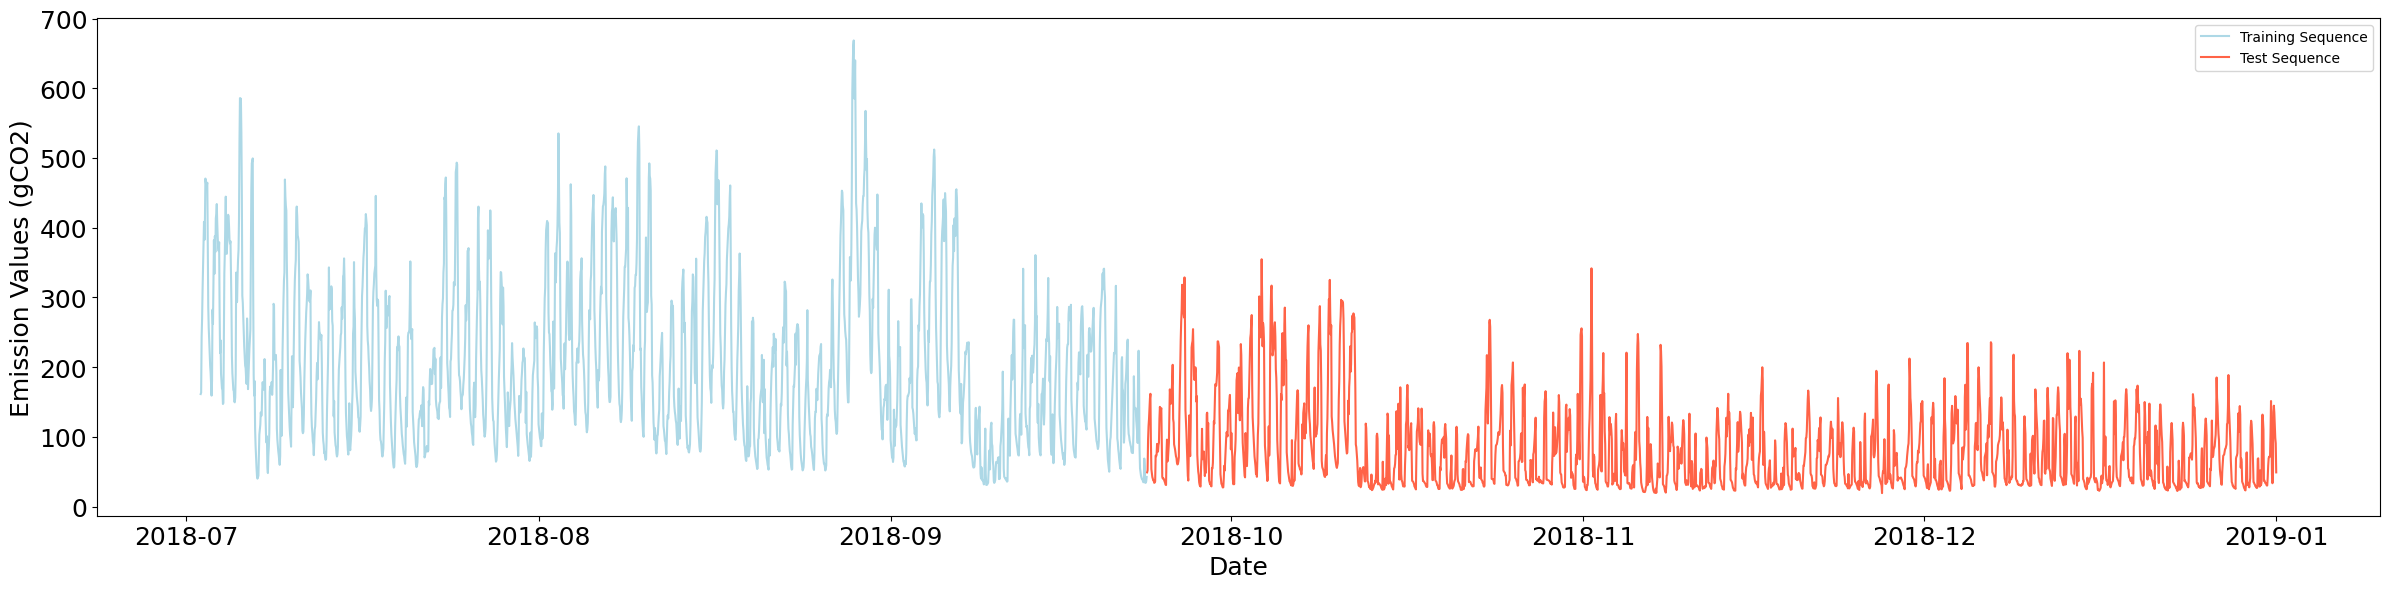

In [108]:
df = pd.read_csv('merged_electricity_carbon_emission.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as the index
df.set_index('timestamp', inplace=True)

# Split the data into training and test sets (assuming the split as mentioned earlier)
# Here, let's take the first 10 records as training and the rest as test for demonstration
train_data = df.iloc[:2000,1]
test_data = df.iloc[2000:,1]

# Plotting
plt.figure(figsize=(24, 6))
plt.plot(train_data, label='Training Sequence', color='lightblue')
plt.plot(test_data, label='Test Sequence', color='tomato')
# plt.title('Training and Test Carbon Emission Time Series for building 10-0')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Emission Values (gCO2)', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

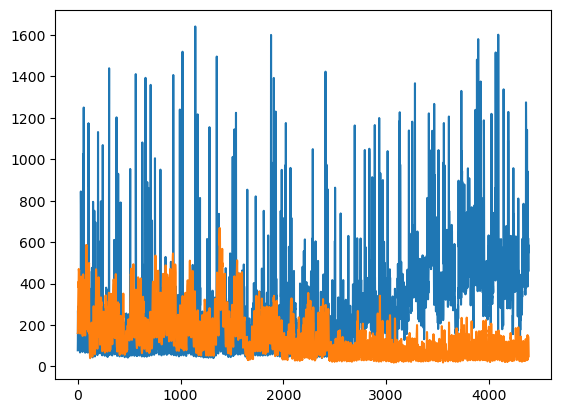

In [19]:
ts_1 = df.iloc[:,1]
ts_2 = df.iloc[:,2]
plt.plot(ts_1)
plt.plot(ts_2)

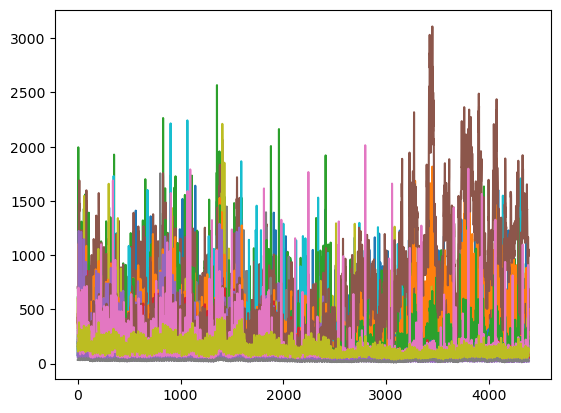

In [20]:
ts = df.iloc[:,1:20]
plt.plot(ts)

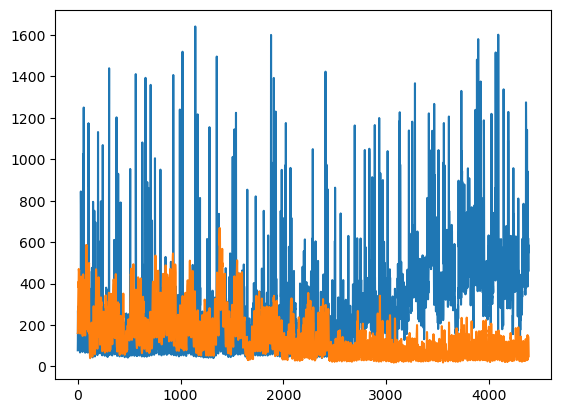

In [21]:
ts_1 = df.iloc[:,1]
ts_2 = df.iloc[:,2]
plt.plot(ts_1)
plt.plot(ts_2)

In [26]:
len(ts_1)

4387

In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
df.iloc[:,82]

0       210.778905
1       229.832104
2       213.727395
3       214.737566
4       216.002483
           ...    
4382    151.412575
4383    101.330456
4384     93.885910
4385     90.169200
4386     57.449653
Name: 101187-0, Length: 4387, dtype: float64

preprocess: min=0.00886293811965251, max=0.41950830169039105, #bins=100
[80.6031, 112.6008, 272.5892, 224.5926, 288.588, 128.5996, 112.6008, 224.5926, 112.6008, 176.5961]
original: 128000 bits, compressed: 2203 bits, compress ratio: 98.28
anomaly
compress 92.7734375, lz 93.359375
normal
compress 93.42447916666666, lz 94.07552083333334
normal
anomaly
compress 92.64322916666666, lz 93.03385416666666
normal
compress 95.05208333333334, lz 93.29427083333334
normal
compress 94.46614583333334, lz 93.1640625
normal
compress 93.42447916666666, lz 92.90364583333334
normal
compress 92.96875, lz 93.1640625
normal
compress 93.68489583333334, lz 92.90364583333334
normal
compress 94.66145833333334, lz 93.03385416666666
normal
compress 92.51302083333334, lz 93.42447916666666
normal
compress 94.46614583333334, lz 93.29427083333334
normal
compress 94.3359375, lz 93.81510416666666
normal
compress 94.20572916666666, lz 94.01041666666666
normal
compress 94.20572916666666, lz 93.03385416666666
normal
compre

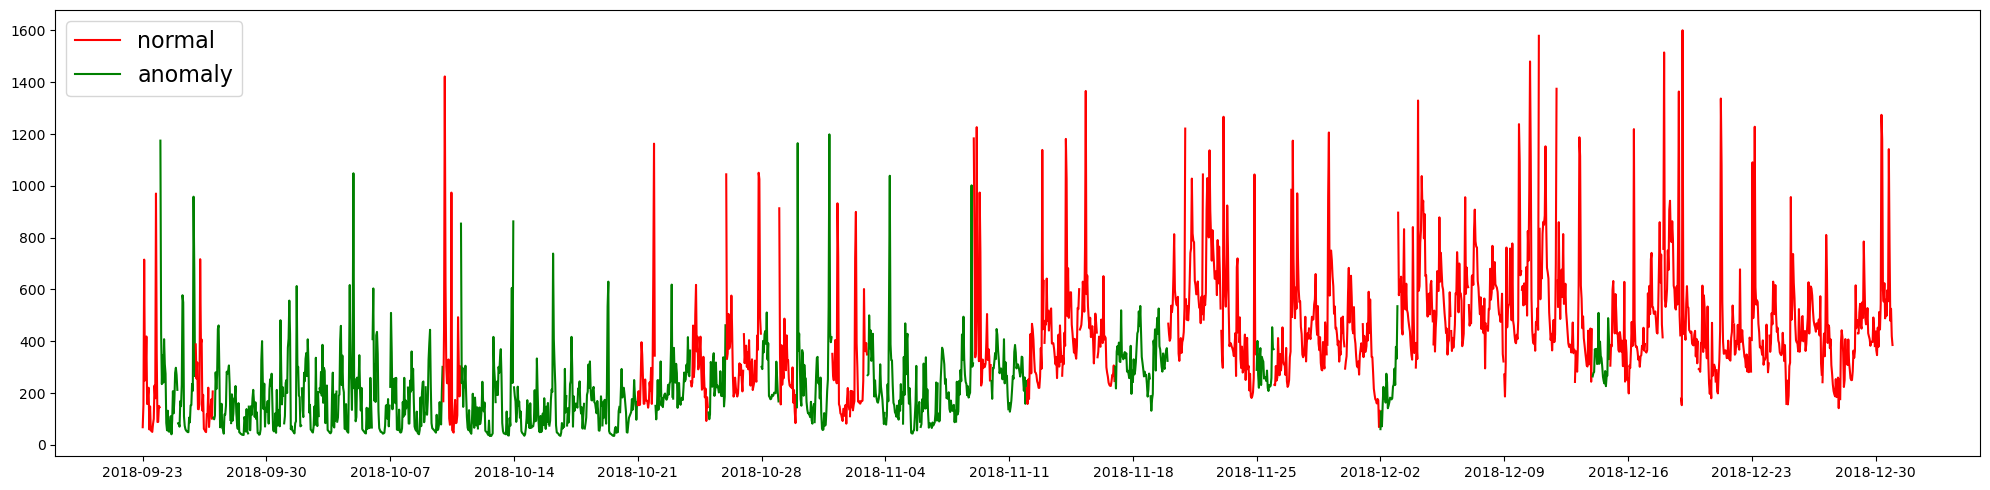

In [109]:
import pandas as pd
df = pd.read_csv('merged_electricity_carbon_emission.csv')

ts_1 = df.iloc[:,1].to_list()
time = df.iloc[:,0].to_list()

ts_1_train = ts_1[:2000]
ts_1_test = ts_1[2000:]
len_test = len(ts_1_test)
min_val = min(ts_1_train)
max_val = max(ts_1_train)

N = len(ts_1_train)
number_of_bins = 100
print(f"preprocess: min={min(x)}, max={max(x)}, #bins={number_of_bins}")
# Discretize the samples
d_x = uniform_quantization(ts_1_train, min_val, max_val, number_of_bins)
print(d_x[:10])

encoder = PDD(max_D=10)
encoder.train(d_x)
encoder.build_code_scheme()
c_x = encoder.parse(d_x)

num_bits = sum([len(code) for (_, code) in c_x])
num_samples = sum([len(phrase) for (phrase, _) in c_x])
print(f"original: {64*N} bits, compressed: {num_bits} bits, compress ratio: {(1-float(num_bits)/(64*N))*100:.2f}")

plt.figure(figsize=(20,5))
label_colors = {'A': 'lightblue', 'B': 'red', 'C': 'green'}

for i in range(1,len_test//24 + 1):
    test_x = ts_1_test[(i-1)*24:i*24]
    test_N = len(test_x)
    try:
        test_dx = uniform_quantization(test_x, min_val, max_val, number_of_bins)  # 归一化使用train的min-max
        test_cx = encoder.parse(test_dx)
        num_bits = sum([len(code) for (_, code) in test_cx])
        num_samples = sum([len(phrase) for (phrase, _) in test_cx])
        compressed_ratio = (1-float(num_bits)/(64*test_N))*100
        lz_ratio = call_LZ(test_x)
        print(f"compress {compressed_ratio}, lz {lz_ratio}")
        if lz_ratio - compressed_ratio > 2:
            print('anomaly threshold')
            plt.plot(time[(2000+(i-1)*24):(2000+i*24)], test_x,label="anomaly",color=label_colors["B"])
        else:
            print('normal')
            plt.plot(time[(2000+(i-1)*24):(2000+i*24)], test_x,label="normal",color=label_colors["C"])
    except:
        print('anomaly')
        plt.plot(time[(2000+(i-1)*24):(2000+i*24)], test_x,label="anomaly",color=label_colors["B"])
plt.legend(['normal','anomaly'],loc='upper left', fontsize=16)
x_time = time[2000:(2000+i*24)]
x_ticks = range(0, len(x_time), 24*7)
x_labels = [pd.Timestamp(x_time[idx]).strftime('%Y-%m-%d') for idx in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.tight_layout()
plt.show()

preprocess: min=0.00886293811965251, max=0.41950830169039105, #bins=100
[209.9751, 229.5575, 213.8916, 213.8916, 217.8081, 229.5575, 245.2234, 256.9729, 264.8058, 296.1377]
original: 128000 bits, compressed: 2203 bits, compress ratio: 98.28
compress 91.40625, lz 92.90364583333334
normal
anomaly
compress 91.6015625, lz 92.90364583333334
normal
compress 90.95052083333334, lz 93.03385416666666
anomaly threshold
anomaly
anomaly
anomaly
anomaly
compress 91.9921875, lz 92.90364583333334
normal
compress 91.53645833333334, lz 92.90364583333334
normal
anomaly
compress 91.92708333333334, lz 92.7734375
normal
compress 91.14583333333334, lz 93.1640625
anomaly threshold
compress 92.1875, lz 92.90364583333334
normal
compress 91.92708333333334, lz 92.90364583333334
normal
compress 92.25260416666666, lz 93.09895833333334
normal
compress 91.92708333333334, lz 93.03385416666666
normal
compress 91.6015625, lz 92.7734375
normal
anomaly
anomaly
anomaly
anomaly
anomaly
compress 88.73697916666666, lz 93.3593

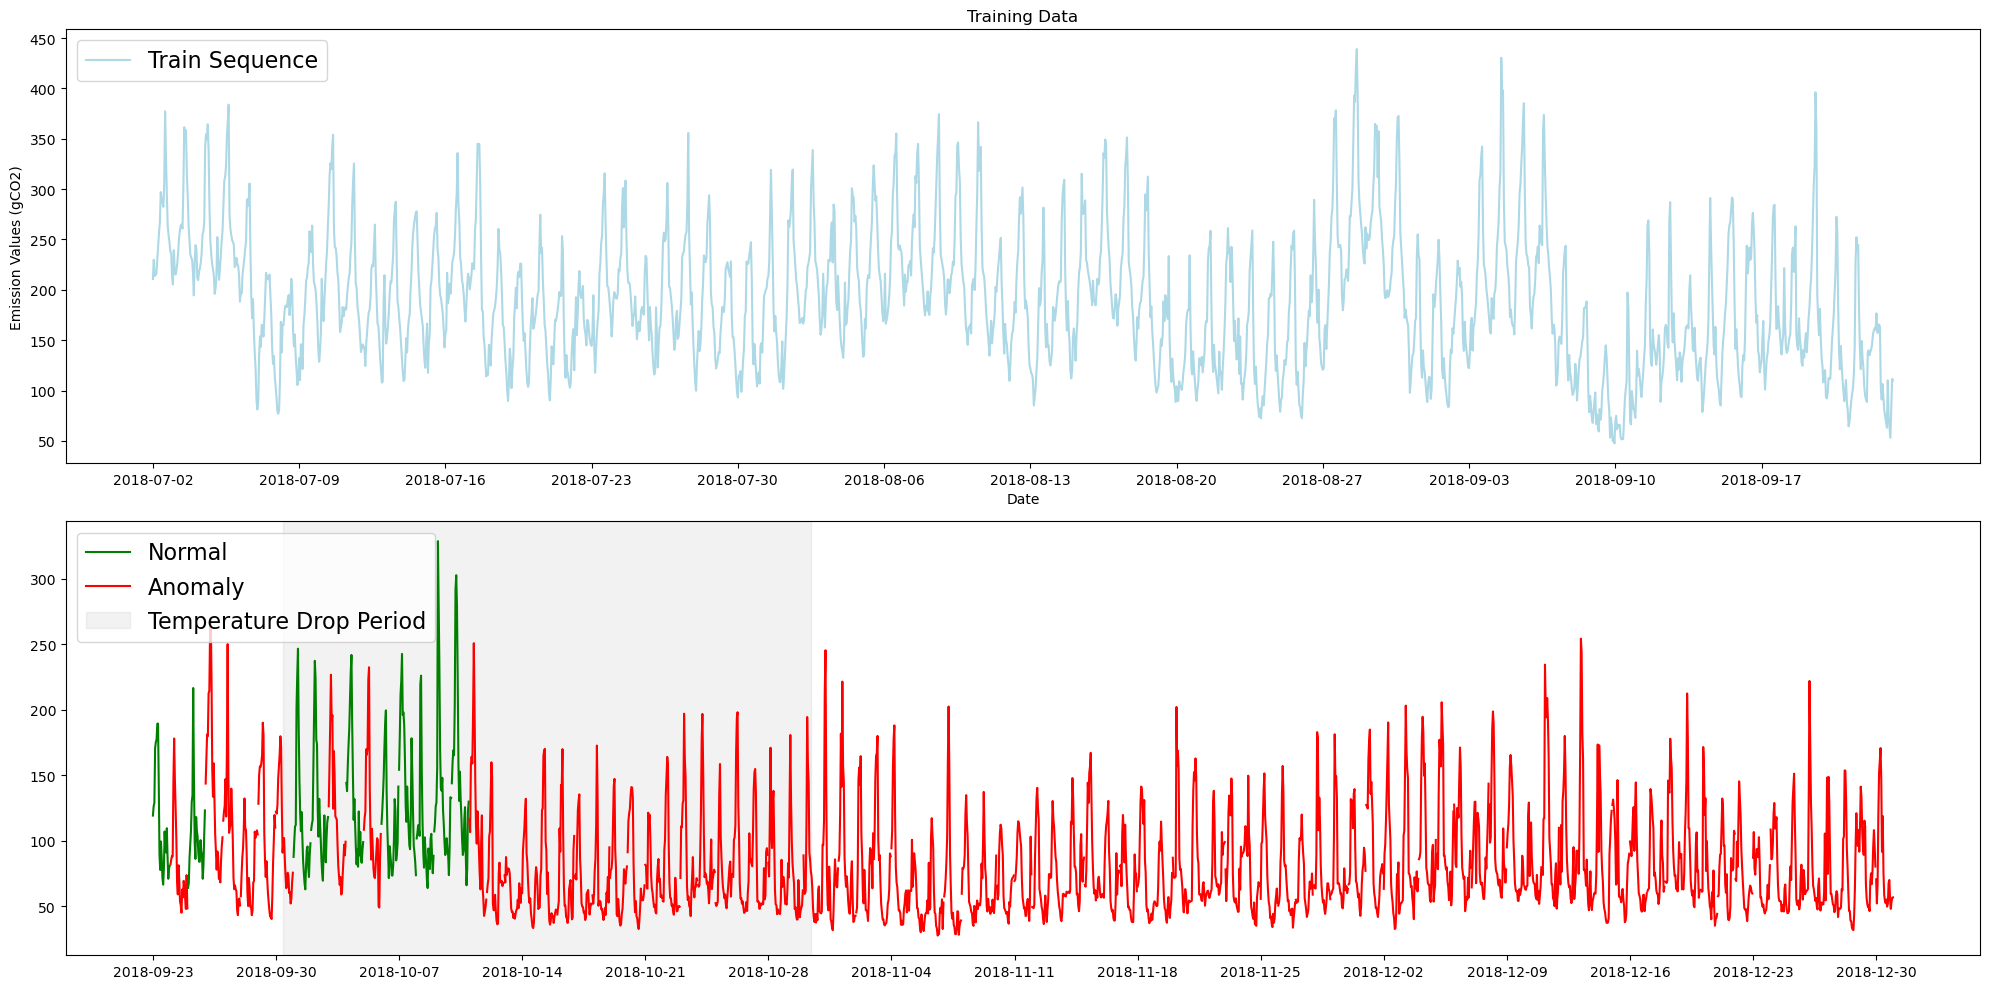

In [112]:
import pandas as pd
import matplotlib.patches as mpatches

# Load your data
df = pd.read_csv('merged_electricity_carbon_emission.csv')

# Extracting the time series data
ts_1 = df.iloc[:,82].to_list() # 1 for 10 82 for other
time = df.iloc[:,0].to_list()

ts_1_train = ts_1[:2000]
ts_1_test = ts_1[2000:]
len_test = len(ts_1_test)
min_val = min(ts_1_train)
max_val = max(ts_1_train)

N = len(ts_1_train)
number_of_bins = 100
print(f"preprocess: min={min(x)}, max={max(x)}, #bins={number_of_bins}")
# Discretize the samples
d_x = uniform_quantization(ts_1_train, min_val, max_val, number_of_bins)
print(d_x[:10])

encoder = PDD(max_D=10)
encoder.train(d_x)
encoder.build_code_scheme()
c_x = encoder.parse(d_x)

num_bits = sum([len(code) for (_, code) in c_x])
num_samples = sum([len(phrase) for (phrase, _) in c_x])
print(f"original: {64*N} bits, compressed: {num_bits} bits, compress ratio: {(1-float(num_bits)/(64*N))*100:.2f}")

plt.figure(figsize=(20, 10))
label_colors = {'A': 'lightblue', 'B': 'red', 'C': 'green'}
plt.subplot(2, 1, 1)
plt.plot(time[:2000], ts_1_train, color='lightblue',label="Train Sequence")
plt.title('Training Data')
plt.xlabel('Date')
plt.ylabel('Emission Values (gCO2)')
x_time = time[:2000]
x_ticks = range(0, len(x_time), 24*7)
x_labels = [pd.Timestamp(x_time[idx]).strftime('%Y-%m-%d') for idx in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.legend(loc='upper left',fontsize=16)


plt.subplot(2, 1, 2)
for i in range(1,len_test//24 + 1):
    test_x = ts_1_test[(i-1)*24:i*24]
    test_N = len(test_x)
    try:
        test_dx = uniform_quantization(test_x, min_val, max_val, number_of_bins)  # 归一化使用train的min-max
        test_cx = encoder.parse(test_dx)
        num_bits = sum([len(code) for (_, code) in test_cx])
        num_samples = sum([len(phrase) for (phrase, _) in test_cx])
        compressed_ratio = (1-float(num_bits)/(64*test_N))*100
        lz_ratio = call_LZ(test_x)
        print(f"compress {compressed_ratio}, lz {lz_ratio}")
        if lz_ratio - compressed_ratio > 2:
            print('anomaly threshold')
            plt.plot(time[(2000+(i-1)*24):(2000+i*24)], test_x,label="anomaly",color=label_colors["B"])
        else:
            print('normal')
            plt.plot(time[(2000+(i-1)*24):(2000+i*24)], test_x,label="normal",color=label_colors["C"])
    except:
        print('anomaly')
        plt.plot(time[(2000+(i-1)*24):(2000+i*24)], test_x,label="anomaly",color=label_colors["B"])

x_time = time[2000:(2000+i*24)]
october_start_index = x_time.index(pd.Timestamp('2018-10-01').strftime('%Y/%m/1 0:00'))
october_end_index = x_time.index(pd.Timestamp('2018-10-31').strftime('%Y/%m/31 0:00'))

plt.axvspan(october_start_index, october_end_index, color='grey', alpha=0.1, label='Temperature Drop Period')
# Create a patch for the legend entry
temp_drop_patch = mpatches.Patch(color='grey', alpha=0.1, label='Temperature Drop Period')

# Creating the legend with custom patch
plt.legend(handles=[plt.Line2D([], [], color='green', label='Normal'),
                    plt.Line2D([], [], color='red', label='Anomaly'),
                    temp_drop_patch], loc='upper left', fontsize=16)

x_ticks = range(0, len(x_time), 24*7)
x_labels = [pd.Timestamp(x_time[idx]).strftime('%Y-%m-%d') for idx in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.tight_layout()
plt.show()

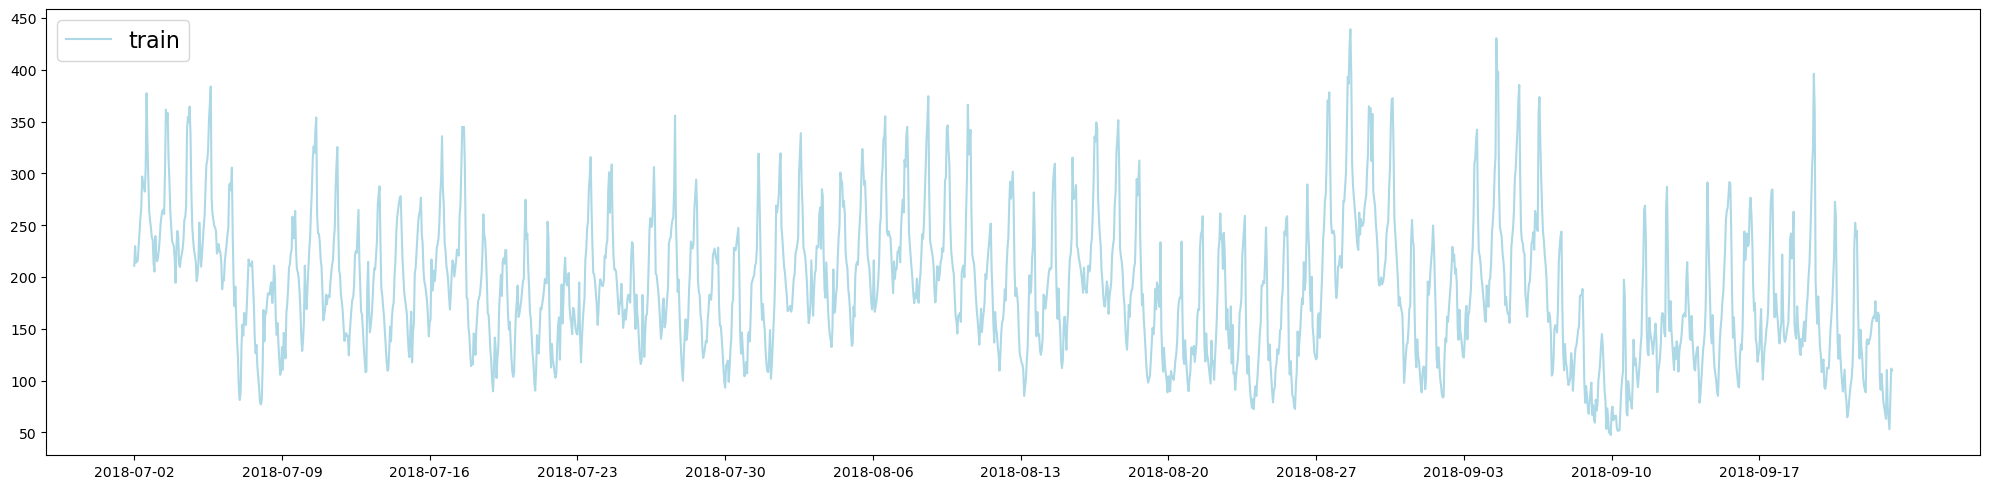

In [31]:
plt.figure(figsize=(20,5))
label_colors = {'A': 'lightblue', 'B': 'orange', 'C': 'green'}
plt.plot(time[:2000], ts_1_train, label="train",color=label_colors["A"])
plt.legend(['train'],loc='upper left', fontsize=16)
x_time = time[:2000]
x_ticks = range(0, len(x_time), 24 * 7)
x_labels = [pd.Timestamp(x_time[idx]).strftime('%Y-%m-%d') for idx in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.tight_layout()
plt.show()